In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install spacytextblob emot demoji ekphrasis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import re
import demoji

demoji.download_codes()

     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 10.4MB 8.7MB/s 
     |████████████████████████████████| 184kB 60.1MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 1.1MB 51.6MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-cp37-none-any.whl size=82844 sha256=e012b915fd4202d1dffa89fe5d9115f81cac599baec379efd7b5d37ff74f2749
  Stored in directory: /root/.cache/pip/wheels/2f/c5/9b/c9b60f535a2cf9fdbc92d84c4801a010c35a9cd348011ed2a1
  Created wheel for ftfy: filename=ftfy-5.9-cp37-none-any.whl size=46451 sha256=bbddaeff26816658c3dff1b27e14939eb169c2d8cd44211cc6997ad8bdb92fcc
  Stored in directory: /root/.cache/pip/wheels/5e/2e/f0/b07196e8c929114998f0316894a61c752b63bfa3fdd50d2fc3
Successfully built ekphrasis ftfy
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstallin

In [ ]:
nlp = spacy.load('en_core_web_sm')
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
orig = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/manually_labelled_test.csv', lineterminator='\n')
adi = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/labelled_test_adi.csv', lineterminator='\n')
zerin = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/labelled_test_zerin.csv', lineterminator='\n')
sean = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/labelled_test_sean.csv', lineterminator='\n')


orig['polarity'] = 0
orig['subjectivity'] = 0

for i in range(len(orig)):
  arr = np.array([adi.loc[i, ['subjectivity', 'polarity']].values,
                sean.loc[i, ['subjectivity', 'polarity']].values,
                zerin.loc[i, ['subjectivity', 'polarity']].values])
  
  orig.loc[i, ['subjectivity', 'polarity']] = stats.mode(arr).mode[0]

orig.to_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/manually_labelled_test.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/sentiment140.csv', encoding = "ISO-8859-1", names=['target', 'ids', 'date', 'flag', 'user', 'text'])

def map(x):
  if x == 0:
    return 1
  return 2

df['subjectivity'] = 1
df['polarity'] = df.target.apply(map)

df = df[['text', 'subjectivity', 'polarity']]

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/findata.csv', encoding = "ISO-8859-1", names=['sentiment', 'text'])

def map(x):
  if x == 'neutral':
    return 0
  if x == 'negative':
    return 1
  return 2

df2['subjectivity'] = (df2['sentiment'] != 'neutral').astype(int)
df2['polarity'] = df2.sentiment.apply(map)

df2 = df2[['text', 'subjectivity', 'polarity']]

In [ ]:
df3 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/airline-tweets.csv', encoding = "ISO-8859-1")

def map(x):
  if x == 'neutral':
    return 0
  if x == 'negative':
    return 1
  return 2

df3['subjectivity'] = (df3['airline_sentiment'] != 'neutral').astype(int)
df3['polarity'] = df3.airline_sentiment.apply(map)

df3 = df3[['text', 'subjectivity', 'polarity']]

In [ ]:
df4 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/processed-neu.csv', encoding = "ISO-8859-1")
df4 = pd.DataFrame.from_dict({'text': df4.columns.values})
df4['subjectivity'] = 0
df4['polarity'] = 0

df5 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/processed-neg.csv', encoding = "ISO-8859-1")
df5 = pd.DataFrame.from_dict({'text': df5.columns.values})
df5['subjectivity'] = 1
df5['polarity'] = 1

df6 = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/processed-pos.csv', encoding = "ISO-8859-1")
df6 = pd.DataFrame.from_dict({'text': df6.columns.values})
df6['subjectivity'] = 1
df6['polarity'] = 2

In [ ]:
df = pd.concat([df2,df3,df4,df5,df6])

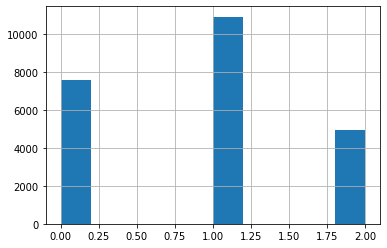

In [ ]:
df.polarity.hist()

In [ ]:
df

,text,subjectivity,polarity
0,"According to Gran , the company has no plans t...",0,0
1,Technopolis plans to develop in stages an area...,0,0
2,The international electronic industry company ...,1,1
3,With the new production plant the company woul...,1,2
4,According to the company 's updated strategy f...,1,2
...,...,...,...
1181,Thanks for the recent follow Happy to connect ...,1,2
1182,- top engaged members this week happy,1,2
1183,ngam to weeks left for cadet pilot exam cryin...,1,2
1184,Great! You're welcome Josh happy ^Adam,1,2


# Studying of text

## stopwords
check the stopwords in the corpus to figure out if any of it is useful

In [ ]:
lexeme = nlp.vocab
for stopwords in lexeme:
  if stopwords.is_stop is True:
    print(stopwords.text)   

In [ ]:
distribution_dictionary = {}
text_arr = list(df.text)
length = 0

nlp = English()
token_list = []

for text in text_arr:
  my_doc = nlp(text)
  for token in my_doc:
      token_list.append(token.text)

for token in token_list:
  lexeme = nlp.vocab[token]
  if lexeme.is_stop is True:
    distribution_dictionary[lexeme.text] = distribution_dictionary.get(lexeme.text, 0) + 1


In [ ]:
import operator

sorted_dict = dict( sorted(distribution_dictionary.items(), key=operator.itemgetter(1),reverse=True))
take_first_20 = {k: sorted_dict[k] for k in list(sorted_dict)[:20]}
print(take_first_20)


{'the': 8580, 'to': 7655, 'of': 6188, 'and': 5839, 'in': 4978, 'a': 4782, 'for': 3843, 'on': 3576, 'is': 2991, "'s": 2856, 'at': 2329, 'with': 2123, 'I': 2050, 'that': 1624, 'you': 1586, 'by': 1568, 'from': 1503, 'The': 1449, 'our': 1444, 'it': 1301}


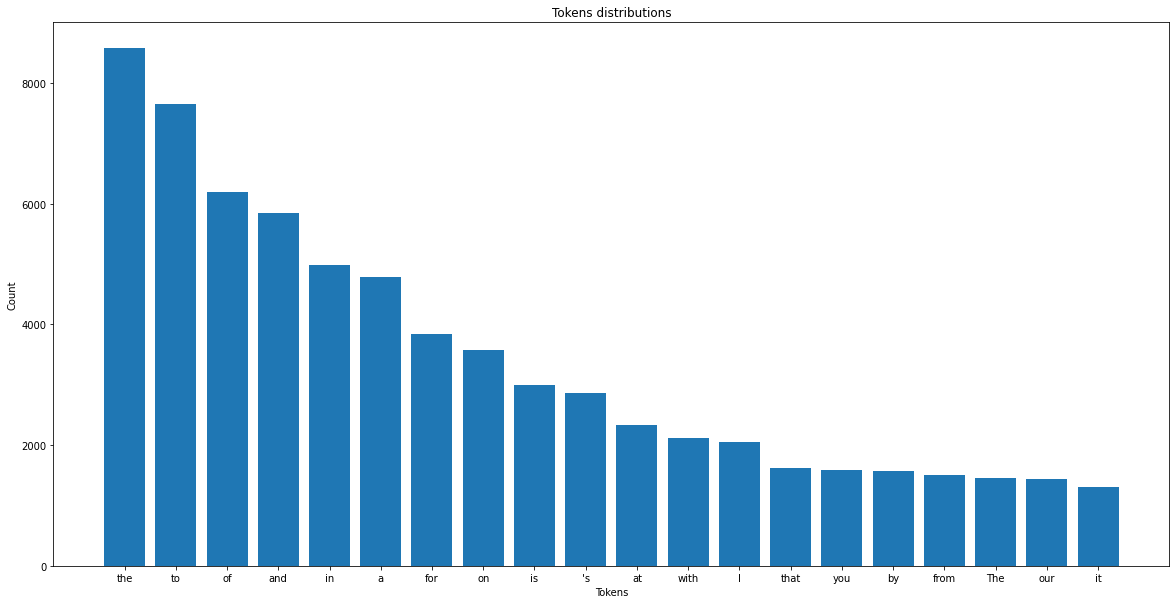

In [ ]:
plt.figure(figsize=(20,10))
plt.ylabel('Count')
plt.xlabel('Tokens')
plt.title('Tokens distributions')
plt.bar(*zip(*take_first_20.items()))
plt.show()

The top 20 stopwords are listed and 'to' seems to be the most useful, but running a quick search on the corpus shows that it doesn't show any informative information. Hence, all stopwords could be removed

## unidentified tokens
check if any unidentified tokens shows any useful information

# Text pre-processing

In [ ]:
nlp = English()

# Converting emojis to words
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text

# Converting emoticons to words    
def remove_emoticons(text):
  if EMOTICONS in text.split():
    text = text.replace(emot, ' ')
  return text

# def demojify(text):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'',text)

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_stopwords(text):
  my_doc = nlp(text)
  filtered_sentence = []
  for token in my_doc:
    lexeme = nlp.vocab[token.text]
    if lexeme.is_stop is False:
        filtered_sentence.append(lexeme.text) 

  return " ".join(filtered_sentence)

def replace_lingos_and_punctuations(text):
  text = re.sub('&gt;', ' greater than ', text)  
  text = re.sub('&lt;', ' lesser than ', text)
  text = re.sub('&le;', ' lesser than or equal to ', text)
  text = re.sub('&ge;', ' greater than or equal to ', text)
  text = re.sub('[^\w\s$%]','', text)
  text = re.sub('&[\w]+;', ' ', text)
  text = re.sub('\n', ' ', text)
  return text

def preprocessing(text):
  text = remove_urls(text)
  text = replace_lingos_and_punctuations(text)
  # text = remove_emoticons(text)
  text = demoji.replace_with_desc(text, sep='')
  text = text.lower()
  text = remove_stopwords(text)
  text = re.sub(' +', ' ', text);
  return text.strip()


tqdm.pandas()
df['processed_text'] = df['text'].progress_apply(preprocessing)

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
df.to_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/combined_23k.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.25, shuffle=True, random_state=42, stratify=df[['subjectivity', 'polarity']])

train.to_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/train2.csv', index=False)
val.to_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/val2.csv', index=False)

# Training

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install transformers sentencepiece ekphrasis
%cd '/content/drive/MyDrive/CZ4034'

import os
import pickle
import math
import numpy as np
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons
from cf_matrix import make_confusion_matrix

from transformers import BertTokenizer, DistilBertTokenizer, AlbertTokenizer, AlbertTokenizerFast, BertweetTokenizer, XLMRobertaTokenizer, AutoTokenizer
from transformers import TFAutoModel, TFAlbertModel, TFDistilBertModel, TFBertModel, TFXLMRobertaModel, AlbertConfig, TFAutoModelForSequenceClassification

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

from tqdm.notebook import tqdm
tqdm.pandas()

/content/drive/.shortcut-targets-by-id/1COYsqQXR8SfJHzELjbatfGx6alsfrSg9/CZ4034


/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
train = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/train2.csv', lineterminator='\n')
val = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/val2.csv', lineterminator='\n')
test = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/manually_labelled_test.csv', lineterminator='\n')

train = train[~train['text'].isna()]
val = val[~val['text'].isna()]
test = test[~test['text'].isna()]

In [4]:
val

,text,subjectivity,polarity,processed_text
0,000 seats across 3400 colleges.,0,0,<number> seats across <number> colleges .
1,@AmericanAir Can care less if youre without yo...,1,1,<user> can care less if youre without your bag...
2,in may go away happy,1,2,in may go away happy
3,@AmericanAir we got to 15 minutes AFTER takeof...,1,1,<user> we got to <number> minutes <allcaps> af...
4,"@JetBlue no, I am fine to fly! Haha, they come...",0,0,"<user> no , i am fine to fly ! haha , they com..."
...,...,...,...,...
5835,@united Got a call. Bag is to be delivered ton...,1,2,<user> got a call . bag is to be delivered ton...
5836,@SouthwestAir you guys rule. I will DM you. &l...,1,2,<user> you guys rule . i will dm you . < <numb...
5837,@JetBlue saving my sanity. Leaving it behind f...,0,0,<user> saving my sanity . leaving it behind fo...
5838,The social plan negotiations were part of the ...,1,2,the social plan negotiations were part of the ...


In [5]:
text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'url', 'date', 'number'],
    # terms that will be annotated
    annotate={"hashtag", "allcaps", "elongated", "repeated",
        'emphasis', 'censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=True,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [6]:
print(" ".join(text_processor.pre_process_doc('😘')))

😘


In [7]:
# train = train[['text', 'subjectivity', 'polarity']]
# val = val[['text', 'subjectivity', 'polarity']]
# test = test[['text', 'subjectivity', 'polarity']]

In [8]:
train['processed_text'] = train.text.progress_apply(lambda x: " ".join(text_processor.pre_process_doc(x)))
val['processed_text'] = val.text.progress_apply(lambda x: " ".join(text_processor.pre_process_doc(x)))
test['processed_text'] = test.text.progress_apply(lambda x: " ".join(text_processor.pre_process_doc(x)))

train = train[~train['processed_text'].isna()]
val = val[~val['processed_text'].isna()]
test = test[~test['processed_text'].isna()]

# train.to_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/train2.csv', index=False)
# val.to_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/val2.csv', index=False)

In [9]:
max(train.text.str.len())

308

In [10]:
str_len = train.text.str.len()
str_len.quantile(0.99)

233.8199999999997

In [11]:
MAX_LEN = 234

In [12]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.40.221.42:8470


INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.40.221.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.40.221.42:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [13]:
# def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
#     """
#     https://www.kaggle.com/xhlulu/jigsaw-tpu-distilbert-with-huggingface-and-keras
#     """
#     tokenizer.enable_truncation(max_length=maxlen)
#     tokenizer.enable_padding(length=maxlen)
#     all_ids = []
    
#     for i in tqdm(range(0, len(texts), chunk_size)):
#         text_chunk = texts[i:i+chunk_size].tolist()
#         encs = tokenizer.encode_batch(text_chunk)
#         all_ids.extend([enc.ids for enc in encs])
    
#     return np.array(all_ids)

# def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
#     encodings = tokenizer(texts, None, truncation=True, padding='max_length', max_length=maxlen)
    
#     return encodings

def fast_encode(sentences, tokenizer, chunk_size=256, maxlen=512):
    input_ids, input_masks = [],[]
    for sentence in tqdm(sentences):
      try:
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=maxlen, 
                                       padding='max_length', 
                                       truncation=True,
                                       return_attention_mask=False, 
                                       return_token_type_ids=False
                                       )
        input_ids.append(inputs['input_ids'])
        # input_masks.append(inputs['attention_mask'])
        # input_segments.append(inputs['token_type_ids'])
      except TypeError:
        print(sentence)

    return np.asarray(input_ids, dtype='int32')

In [14]:
BERTWEET = 'vinai/bertweet-base'
ALBERT = 'albert-base-v2'
BERT_BASE = 'bert-base-uncased'
BERT_LARGE = 'bert-large-uncased'
DISTILBERT_BASE = 'distilbert-base-uncased'
XLM_ROBERTA_BASE = 'jplu/tf-xlm-roberta-base'
ROBERTA_TWITTER_BASE = 'cardiffnlp/twitter-roberta-base-sentiment'

bert_type = ROBERTA_TWITTER_BASE
# slow_tokenizer = AlbertTokenizer.from_pretrained(bert_type)

with strategy.scope():
  fast_tokenizer = AutoTokenizer.from_pretrained(bert_type, do_lower_case=True, use_fast=True)
  base_model = TFAutoModel.from_pretrained(bert_type, output_hidden_states=False)

# Save the slow pretrained tokenizer
# save_path = "/content/drive/My Drive/CZ4034/{}/".format(bert_type)
# if not os.path.exists(save_path):
#     os.makedirs(save_path)
# slow_tokenizer.save_pretrained(save_path)

# Load the fast tokenizer from saved file
# fast_tokenizer = BertWordPieceTokenizer("/content/drive/My Drive/CZ4034/{}/vocab.txt".format(bert_type), 
#                                    lowercase=True)

Some layers from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing TFRobertaModel: ['classifier']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [15]:
test.columns = ['text', 'timestamp', 'code', 'company', 'processed_text',
       'subjectivity', 'polarity']

In [16]:
with strategy.scope():
  train = train[~train['text'].isna()]
  val = val[~val['text'].isna()]
  test = test[~test['text'].isna()]

  X_train = fast_encode(train.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)
  X_val = fast_encode(val.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)
  X_test = fast_encode(test.text.values.tolist(), fast_tokenizer, maxlen=MAX_LEN)

  sub_train = np.eye(2)[train.subjectivity.values]
  sub_val = np.eye(2)[val.subjectivity.values]
  sub_test = np.eye(2)[test.subjectivity.values]

  pol_train = np.eye(3)[train.polarity.values]
  pol_val = np.eye(3)[val.polarity.values]
  pol_test = np.eye(3)[test.polarity.values]

  y_train = {'subjectivity': sub_train, 'polarity': pol_train}
  y_val = {'subjectivity': sub_val, 'polarity': pol_val}
  y_test = {'subjectivity': sub_test, 'polarity': pol_test}

In [17]:
def save_encodings(name):
  dump = {
      'X_train': X_train,
      'X_val': X_val,
      'y_train': y_train,
      'y_val': y_val
  }

  with open('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/encodings_{}.pickle'.format(name), 'wb+') as handle:
    pickle.dump(dump, handle, protocol=pickle.HIGHEST_PROTOCOL)  

def load_encodings(name):
  with open('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/encodings_{}.pickle'.format(name), 'rb') as handle:
    dump = pickle.load(handle)

  return dump['X_train'], dump['X_val'], dump['y_train'], dump['y_val']

In [ ]:
# Save encodings
save_encodings(bert_type.split('/')[-1])

In [ ]:
# Reload encoded inputs from file if runtime crashes, no need to re-encode
X_train, X_val, y_train, y_val = load_encodings(bert_type.split('/')[-1])

In [18]:
BATCH_SIZE = 32 * strategy.num_replicas_in_sync
AUTO = tf.data.experimental.AUTOTUNE

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, pol_train))
train_dataset = train_dataset.shuffle(10 * BATCH_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.prefetch(AUTO)

In [20]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, pol_val))
val_dataset = val_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.cache()
val_dataset = val_dataset.prefetch(AUTO)

In [21]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, pol_test))
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.cache()
test_dataset = test_dataset.prefetch(AUTO)

In [22]:
# def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
#     """
#     https://www.kaggle.com/xhlulu/jigsaw-tpu-distilbert-with-huggingface-and-keras
#     """

#     for layer in transformer.layers:
#       layer.trainable = True

#     input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
#     sequence_output = transformer(input_word_ids)[0]
#     cls_token = sequence_output[:, 0, :]

#     norm = BatchNormalization()(cls_token)
#     dropout1 = Dropout(dropout_val)(norm)
#     dense = Dense(1024, activation='relu')(dropout1)
#     dropout2 = Dropout(dropout_val)(dense)

#     subjectivity = Dense(2, activation='softmax', name='subjectivity')(dropout2)
#     polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
#     model = Model(inputs=input_word_ids, outputs=[subjectivity, polarity])

#     model.compile(Adam(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
#     return model

In [23]:
def exp_decay(epoch):
  if epoch < 5:
    return 5e-5*(epoch+1)/5

  initial_lrate = 5e-5
  k = 0.1
  lrate = initial_lrate * math.exp(-k*(epoch-4))
  return lrate

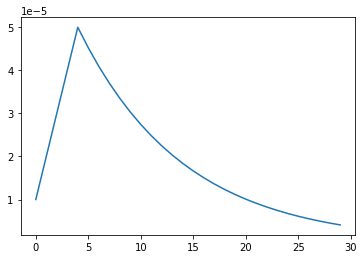

In [24]:
plt.plot([exp_decay(x) for x in range(30)])

In [25]:
def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
    # for layer in transformer.layers[:-20]:
    #   layer.trainable = False

    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    norm = BatchNormalization()(cls_token)
    dropout1 = Dropout(dropout_val)(norm)
    dense = Dense(1024, activation='relu')(dropout1)
    dropout2 = Dropout(dropout_val)(dense)

    subjectivity = Dense(2, activation='softmax', name='subjectivity')(dropout2)
    polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
    model = Model(inputs=input_word_ids, outputs=[subjectivity, polarity])

    model.compile(SGD(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
    return model

with strategy.scope():
  # transformer_layer = (base_model)
  model = build_model(base_model, max_len=MAX_LEN, dropout_val=0.2, lr=1e-3)
model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 234)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_word_ids[0][0]             
__________________________________________________________________________________________________
tf.__operators__.getitem (Slici (None, 768)          0           tf_roberta_model[0][0]           
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 768)          3072        tf.__operators__.getitem[0][0]   
______________________________________________________________________________________________

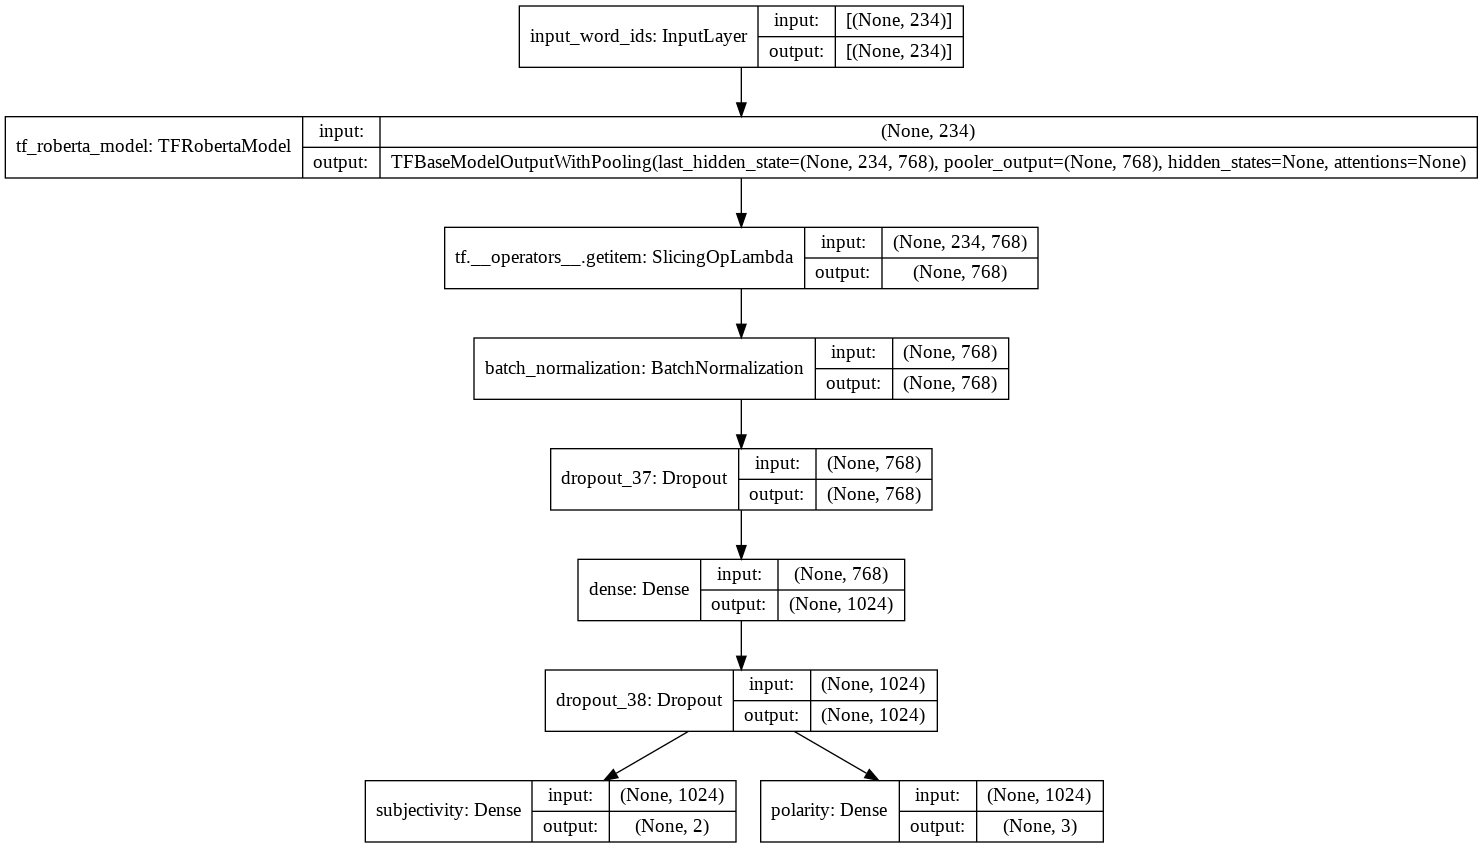

In [27]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='/content/drive/My Drive/CZ4034/model_architecture.png')

In [ ]:
STEPS = len(X_train) // BATCH_SIZE

with strategy.scope():
  history = model.fit(
      train_dataset,
      steps_per_epoch=STEPS,
      validation_data=val_dataset,
      epochs=30,
      callbacks=[
                #  tf.keras.callbacks.LearningRateScheduler(exp_decay),
                 tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
                 tf.keras.callbacks.CSVLogger("roberta_full.csv", append=False),
                 tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/CZ4034/roberta-base-finetuned-weights.h5', 
                                                    monitor='val_loss', 
                                                    verbose=0, 
                                                    save_best_only=True, 
                                                    save_weights_only=True)
                 ]
  )

Epoch 1/30


68/68 [==============================] - ETA: 0s - loss: 1.0575 - subjectivity_loss: 0.4182 - polarity_loss: 0.6393 - subjectivity_accuracy: 0.8136 - polarity_accuracy: 0.7301WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


68/68 [==============================] - 89s 662ms/step - loss: 1.0547 - subjectivity_loss: 0.4174 - polarity_loss: 0.6373 - subjectivity_accuracy: 0.8141 - polarity_accuracy: 0.7312 - val_loss: 0.7723 - val_subjectivity_loss: 0.3139 - val_polarity_loss: 0.4583 - val_subjectivity_accuracy: 0.8757 - val_polarity_accuracy: 0.8465
Epoch 2/30
68/68 [==============================] - 51s 419ms/step - loss: 0.7651 - subjectivity_loss: 0.3247 - polarity_loss: 0.4404 - subjectivity_accuracy: 0.8693 - polarity_accuracy: 0.8408 - val_loss: 0.7036 - val_subjectivity_loss: 0.2947 - val_polarity_loss: 0.4089 - val_subjectivity_accuracy: 0.8765 - val_polarity_accuracy: 0.8498
Epoch 3/30
68/68 [==============================] - 29s 425ms/step - loss: 0.7255 - subjectivity_loss: 0.3117 - polarity_loss: 0.4137 - subjectivity_accuracy: 0.8746 - polarity_accuracy: 0.8493 - val_loss: 0.6894 - val_subjectivity_loss: 0.2943 - val_polarity_loss: 0.3951 - val_subjectivity_accuracy: 0.8777 - val_polarity_accur

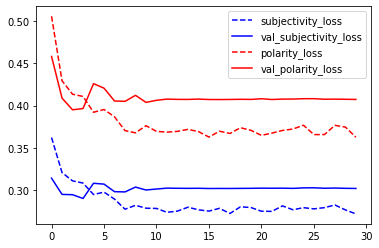

In [ ]:
plt.plot(history.history['subjectivity_loss'], 'b--')
plt.plot(history.history['val_subjectivity_loss'], 'b-')
plt.plot(history.history['polarity_loss'], 'r--')
plt.plot(history.history['val_polarity_loss'], 'r-')
plt.legend(['subjectivity_loss', 'val_subjectivity_loss', 'polarity_loss', 'val_polarity_loss'], loc='upper right')
plt.show()

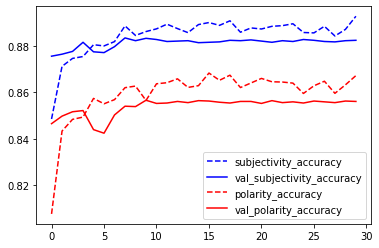

In [ ]:
plt.plot(history.history['subjectivity_accuracy'], 'b--')
plt.plot(history.history['val_subjectivity_accuracy'], 'b-')
plt.plot(history.history['polarity_accuracy'], 'r--')
plt.plot(history.history['val_polarity_accuracy'], 'r-')
plt.legend(['subjectivity_accuracy', 'val_subjectivity_accuracy', 'polarity_accuracy', 'val_polarity_accuracy'])
plt.show()

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/roberta-base-finetuned-weights.h5')
  model.evaluate(test_dataset)

7/7 [==============================] - 21s 1s/step - loss: 1.7016 - subjectivity_loss: 0.8420 - polarity_loss: 0.8596 - subjectivity_accuracy: 0.7004 - polarity_accuracy: 0.7020


In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/roberta-base-finetuned-weights.h5')
  y_pred = model.predict(test_dataset, verbose=1)

7/7 [==============================] - 16s 2s/step


In [ ]:
def save_pred(y_pred, name):
  test['subjectivity_pred_prob'] = np.amax(y_pred[0], axis=1)
  test['subjectivity_pred'] = np.argmax(y_pred[0], axis=1)
  test['polarity_pred_prob'] = np.amax(y_pred[1], axis=1)
  test['polarity_pred'] = np.argmax(y_pred[1], axis=1)

  indices = test[(test.subjectivity_pred == 0) & (test.polarity_pred != 0)].index
  test.loc[indices, 'polarity_pred'] = 0

  test.to_csv(name, index=False)

In [ ]:
save_pred(y_pred, '/content/drive/My Drive/CZ4034/predictions/roberta+preprocessing+multitask.csv')

## Roberta + Preprocessing

In [ ]:
def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    norm = BatchNormalization()(cls_token)
    dropout1 = Dropout(dropout_val)(norm)
    dense = Dense(1024, activation='relu')(dropout1)
    dropout2 = Dropout(dropout_val)(dense)

    # subjectivity = Dense(2, activation='softmax', name='subjectivity')(dropout2)
    polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
    model = Model(inputs=input_word_ids, outputs=[polarity])

    model.compile(SGD(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
    return model

with strategy.scope():
  # transformer_layer = (base_model)
  model = build_model(base_model, max_len=MAX_LEN, dropout_val=0.5, lr=1e-4)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 234)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 124645632 
_________________________________________________________________
tf.__operators__.getitem_1 ( (None, 768)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 768)               3072      
_________________________________________________________________
dropout_39 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              787456    
_________________________________________________________________
dropout_40 (Dropout)         (None, 1024)              0   

In [ ]:
STEPS = len(X_train) // BATCH_SIZE

with strategy.scope():
  history = model.fit(
      train_dataset,
      steps_per_epoch=STEPS,
      validation_data=val_dataset,
      epochs=8,
      callbacks=[
                #  tf.keras.callbacks.LearningRateScheduler(exp_decay),
                 tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
                 tf.keras.callbacks.CSVLogger("/content/drive/My Drive/CZ4034/roberta_polarity.csv", append=False),
                 tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/CZ4034/roberta-base-polarity-weights.h5', 
                                                    monitor='val_loss', 
                                                    verbose=0, 
                                                    save_best_only=True, 
                                                    save_weights_only=True)
                 ]
  )

Epoch 1/8


68/68 [==============================] - ETA: 0s - loss: 1.2048 - accuracy: 0.5432WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


68/68 [==============================] - 90s 658ms/step - loss: 1.2011 - accuracy: 0.5445 - val_loss: 0.7104 - val_accuracy: 0.8318
Epoch 2/8
68/68 [==============================] - 52s 409ms/step - loss: 0.5180 - accuracy: 0.8024 - val_loss: 0.5279 - val_accuracy: 0.8493
Epoch 3/8
68/68 [==============================] - 28s 410ms/step - loss: 0.3423 - accuracy: 0.8799 - val_loss: 0.4680 - val_accuracy: 0.8433
Epoch 4/8
68/68 [==============================] - 28s 411ms/step - loss: 0.2793 - accuracy: 0.9086 - val_loss: 0.4748 - val_accuracy: 0.8433
Epoch 5/8
68/68 [==============================] - 28s 407ms/step - loss: 0.2564 - accuracy: 0.9204 - val_loss: 0.5174 - val_accuracy: 0.8412
Epoch 6/8
68/68 [==============================] - 28s 406ms/step - loss: 0.2167 - accuracy: 0.9340 - val_loss: 0.5608 - val_accuracy: 0.8404

Epoch 00006: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 7/8
68/68 [==============================] - 28s 407ms/step - loss: 0.2

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/roberta-base-polarity-weights.h5')
  y_pred = model.predict(test_dataset, verbose=1)

7/7 [==============================] - 1s 118ms/step


In [ ]:
def save_pred(y_pred, name):
  test['polarity_pred_prob'] = np.amax(y_pred, axis=1)
  test['polarity_pred'] = np.argmax(y_pred, axis=1)

  test.to_csv(name, index=False)

In [ ]:
save_pred(y_pred, '/content/drive/My Drive/CZ4034/predictions/roberta+preprocessing.csv')

In [ ]:
test

,text,timestamp,code,company,processed_text,subjectivity,polarity,polarity_pred_prob,polarity_pred
0,"PepsiCo Inc (PEP) price at close, 2021-03-02, ...",Tue Mar 02 22:52:40 +0000 2021,PEP,PepsiCo Inc.,pepsico inc pep price close 20210302 13107 fyi...,0,0,0.540987,0
1,Teleflex v. Continental Can Co.. (1883) Prayer...,Mon Mar 08 23:24:58 +0000 2021,TFX,Teleflex,teleflex v continental co 1883 prayer protecte...,0,0,0.820951,0
2,Researchers at @Harvard &amp; @MassGeneralNews...,Tue Mar 09 23:01:26 +0000 2021,LLY,Lilly (Eli) & Co.,researchers harvard amp massgeneralnews publis...,0,0,0.885765,0
3,"United Airlines holdings, Inc. (UAL) announced...",Thu Mar 04 02:31:03 +0000 2021,UAL,United Airlines Holdings,united airlines holdings inc ual announced tod...,1,2,0.917570,2
4,"At Thermo Fisher Scientific, what you do every...",Wed Mar 10 01:41:37 +0000 2021,TMO,Thermo Fisher Scientific,thermo fisher scientific day meaningful click ...,0,0,0.904133,2
...,...,...,...,...,...,...,...,...,...
1673,#advertising #digitalagency #mediaagency Omnic...,Tue Mar 02 13:16:42 +0000 2021,OMC,Omnicom Group,advertising digitalagency mediaagency omnicom ...,0,0,0.803899,2
1674,$CDNS:\n\nNew Insider Filing on CADENCE DESIGN...,Tue Mar 02 09:05:23 +0000 2021,CDNS,Cadence Design Systems,$ cdns new insider filing cadence design syste...,0,0,0.858357,0
1675,@Stonekettle Can we seize the nearest Trump co...,Tue Mar 09 23:04:53 +0000 2021,LNC,Lincoln National,stonekettle seize nearest trump country club d...,1,1,0.910325,0
1676,"One of our industry partners, Valero Energy, g...",Fri Mar 05 17:00:02 +0000 2021,VLO,Valero Energy,industry partners valero energy gives ways lik...,1,2,0.873240,0


## Roberta + Multitask

In [ ]:
def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    norm = BatchNormalization()(cls_token)
    dropout1 = Dropout(dropout_val)(norm)
    dense = Dense(1024, activation='relu')(dropout1)
    dropout2 = Dropout(dropout_val)(dense)

    subjectivity = Dense(2, activation='softmax', name='subjectivity')(dropout2)
    polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
    model = Model(inputs=input_word_ids, outputs=[subjectivity, polarity])

    model.compile(Adam(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
    return model

with strategy.scope():
  # transformer_layer = (base_model)
  model = build_model(base_model, max_len=MAX_LEN, dropout_val=0.6, lr=1e-5)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 234)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_word_ids[0][0]             
__________________________________________________________________________________________________
tf.__operators__.getitem_3 (Sli (None, 768)          0           tf_roberta_model[3][0]           
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 768)          3072        tf.__operators__.getitem_3[0][0] 
____________________________________________________________________________________________

In [ ]:
STEPS = len(X_train) // BATCH_SIZE

with strategy.scope():
  history = model.fit(
      train_dataset,
      steps_per_epoch=STEPS,
      validation_data=val_dataset,
      epochs=5,
      callbacks=[
                #  tf.keras.callbacks.LearningRateScheduler(exp_decay),
                #  tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
                 tf.keras.callbacks.CSVLogger("/content/drive/My Drive/CZ4034/roberta_non_preprocessed.csv", append=False),
                 tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/CZ4034/roberta-non-preprocessed-weights.h5', 
                                                    monitor='val_loss', 
                                                    verbose=0, 
                                                    save_best_only=True, 
                                                    save_weights_only=True)
                 ]
  )

Epoch 1/5


68/68 [==============================] - ETA: 0s - loss: 1.0739 - subjectivity_loss: 0.4808 - polarity_loss: 0.5931 - subjectivity_accuracy: 0.8210 - polarity_accuracy: 0.8129WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


68/68 [==============================] - 129s 699ms/step - loss: 1.0659 - subjectivity_loss: 0.4771 - polarity_loss: 0.5888 - subjectivity_accuracy: 0.8225 - polarity_accuracy: 0.8143 - val_loss: 0.7455 - val_subjectivity_loss: 0.3111 - val_polarity_loss: 0.4344 - val_subjectivity_accuracy: 0.8854 - val_polarity_accuracy: 0.8548
Epoch 2/5
68/68 [==============================] - 81s 443ms/step - loss: 0.2411 - subjectivity_loss: 0.0930 - polarity_loss: 0.1481 - subjectivity_accuracy: 0.9756 - polarity_accuracy: 0.9638 - val_loss: 0.9224 - val_subjectivity_loss: 0.4065 - val_polarity_loss: 0.5159 - val_subjectivity_accuracy: 0.8693 - val_polarity_accuracy: 0.8435
Epoch 3/5
68/68 [==============================] - 30s 442ms/step - loss: 0.2063 - subjectivity_loss: 0.0821 - polarity_loss: 0.1241 - subjectivity_accuracy: 0.9794 - polarity_accuracy: 0.9675 - val_loss: 1.1042 - val_subjectivity_loss: 0.5036 - val_polarity_loss: 0.6006 - val_subjectivity_accuracy: 0.8728 - val_polarity_accura

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/roberta-non-preprocessed-weights.h5')
  y_pred = model.predict(test_dataset, verbose=1)

7/7 [==============================] - 16s 2s/step


In [ ]:
def save_pred(y_pred, name):
  test['subjectivity_pred_prob'] = np.amax(y_pred[0], axis=1)
  test['subjectivity_pred'] = np.argmax(y_pred[0], axis=1)
  test['polarity_pred_prob'] = np.amax(y_pred[1], axis=1)
  test['polarity_pred'] = np.argmax(y_pred[1], axis=1)

  indices = test[(test.subjectivity_pred == 0) & (test.polarity_pred != 0)].index
  test.loc[indices, 'polarity_pred'] = 0

  test.to_csv(name, index=False)

In [ ]:
save_pred(y_pred, '/content/drive/My Drive/CZ4034/predictions/roberta+multitask.csv')

## Roberta

In [ ]:
def build_model(transformer, max_len=512, dropout_val=0.1, lr=1e-5):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]

    norm = BatchNormalization()(cls_token)
    dropout1 = Dropout(dropout_val)(norm)
    dense = Dense(1024, activation='relu')(dropout1)
    dropout2 = Dropout(dropout_val)(dense)

    polarity = Dense(3, activation='softmax', name='polarity')(dropout2)
    
    model = Model(inputs=input_word_ids, outputs=[polarity])

    model.compile(Adam(lr), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy('accuracy')])
    
    return model

with strategy.scope():
  # transformer_layer = (base_model)
  model = build_model(base_model, max_len=MAX_LEN, dropout_val=0.5, lr=1e-5)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 234)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 124645632 
_________________________________________________________________
tf.__operators__.getitem_4 ( (None, 768)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 768)               3072      
_________________________________________________________________
dropout_45 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              787456    
_________________________________________________________________
dropout_46 (Dropout)         (None, 1024)              0   

In [ ]:
STEPS = len(X_train) // BATCH_SIZE

with strategy.scope():
  history = model.fit(
      train_dataset,
      steps_per_epoch=STEPS,
      validation_data=val_dataset,
      epochs=10,
      callbacks=[
                #  tf.keras.callbacks.LearningRateScheduler(exp_decay),
                 tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
                 tf.keras.callbacks.CSVLogger("/content/drive/My Drive/CZ4034/roberta-base.csv", append=False),
                 tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/CZ4034/roberta-base-weights.h5', 
                                                    monitor='val_loss', 
                                                    verbose=0, 
                                                    save_best_only=True, 
                                                    save_weights_only=True)
                 ]
  )

Epoch 1/10


68/68 [==============================] - ETA: 0s - loss: 0.4055 - accuracy: 0.8552WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


68/68 [==============================] - 128s 688ms/step - loss: 0.4022 - accuracy: 0.8565 - val_loss: 0.4413 - val_accuracy: 0.8604
Epoch 2/10
68/68 [==============================] - 78s 432ms/step - loss: 0.0660 - accuracy: 0.9841 - val_loss: 0.5089 - val_accuracy: 0.8633
Epoch 3/10
68/68 [==============================] - 29s 430ms/step - loss: 0.0605 - accuracy: 0.9859 - val_loss: 0.6076 - val_accuracy: 0.8603
Epoch 4/10
68/68 [==============================] - 29s 429ms/step - loss: 0.0536 - accuracy: 0.9883 - val_loss: 0.7218 - val_accuracy: 0.8616

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 5/10
68/68 [==============================] - 29s 430ms/step - loss: 0.0526 - accuracy: 0.9886 - val_loss: 0.7618 - val_accuracy: 0.8608
Epoch 6/10
68/68 [==============================] - 29s 430ms/step - loss: 0.0415 - accuracy: 0.9913 - val_loss: 0.7916 - val_accuracy: 0.8603
Epoch 7/10
68/68 [==============================] - 29s 430ms/step - lo

In [ ]:
with strategy.scope():
  model.load_weights('/content/drive/My Drive/CZ4034/roberta-base-weights.h5')
  y_pred = model.predict(test_dataset, verbose=1)

7/7 [==============================] - 16s 2s/step


In [ ]:
def save_pred(y_pred, name):
  test['polarity_pred_prob'] = np.amax(y_pred, axis=1)
  test['polarity_pred'] = np.argmax(y_pred, axis=1)

  test.to_csv(name, index=False)

In [ ]:
save_pred(y_pred, '/content/drive/My Drive/CZ4034/predictions/roberta.csv')

# Metrics

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
roberta = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/roberta.csv')
roberta_multi = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/roberta+multitask.csv')
roberta_pre = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/roberta+preprocessing.csv')
roberta_pre_multi = pd.read_csv('/content/drive/My Drive/CZ4034/predictions/roberta+preprocessing+multitask.csv')

## Roberta

In [ ]:
clf_report = classification_report(roberta.polarity, roberta.polarity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.775,0.637,0.623,0.723,0.678,0.718
recall,0.817,0.599,0.561,0.723,0.659,0.723
f1-score,0.795,0.618,0.591,0.723,0.668,0.720
support,1028.000,217.000,433.000,0.723,1678.000,1678.000


## Roberta Multitask

In [ ]:
clf_report = classification_report(roberta_multi.polarity, roberta_multi.polarity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.776,0.623,0.638,0.725,0.679,0.721
recall,0.813,0.664,0.545,0.725,0.674,0.725
f1-score,0.794,0.643,0.588,0.725,0.675,0.721
support,1028.000,217.000,433.000,0.725,1678.000,1678.000


In [ ]:
clf_report = classification_report(roberta_multi.subjectivity, roberta_multi.subjectivity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,accuracy,macro avg,weighted avg
precision,0.779,0.672,0.74,0.725,0.738
recall,0.803,0.639,0.74,0.721,0.740
f1-score,0.791,0.655,0.74,0.723,0.738
support,1029.000,649.000,0.74,1678.000,1678.000


## Roberta Preprocessed

In [ ]:
clf_report = classification_report(roberta_pre.polarity, roberta_pre.polarity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.751,0.540,0.489,0.656,0.593,0.656
recall,0.750,0.530,0.494,0.656,0.591,0.656
f1-score,0.750,0.535,0.491,0.656,0.592,0.656
support,1028.000,217.000,433.000,0.656,1678.000,1678.000


## Roberta Preprocessed Multitask

In [ ]:
clf_report = classification_report(roberta_pre_multi.polarity, roberta_pre_multi.polarity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,2,accuracy,macro avg,weighted avg
precision,0.690,0.707,0.644,0.684,0.680,0.680
recall,0.912,0.267,0.351,0.684,0.510,0.684
f1-score,0.786,0.388,0.454,0.684,0.543,0.649
support,1028.000,217.000,433.000,0.684,1678.000,1678.000


In [ ]:
clf_report = classification_report(roberta_pre_multi.subjectivity, roberta_pre_multi.subjectivity_pred, output_dict=True)
pd.DataFrame.from_dict(clf_report).round(3)

,0,1,accuracy,macro avg,weighted avg
precision,0.690,0.717,0.695,0.704,0.701
recall,0.913,0.351,0.695,0.632,0.695
f1-score,0.786,0.472,0.695,0.629,0.664
support,1029.000,649.000,0.695,1678.000,1678.000


In [ ]:
orig = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/manually_labelled_test.csv', lineterminator='\n')
adi = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/labelled_test_adi.csv', lineterminator='\n')
zerin = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/labelled_test_zerin.csv', lineterminator='\n')
sean = pd.read_csv('/content/drive/My Drive/CZ4034/Data_crawling/twitter/new/labelled_test_sean.csv', lineterminator='\n')

fleiss_matrix_dict = {
    'Index': [],
    'Objective': [],
    'Negative': [],
    'Positive': [],
    'Pi': []
}

for i in range(len(orig)):
  counts = {0: 0, 1: 0, 2: 0}

  counts[adi.loc[i, 'polarity']] += 1
  counts[sean.loc[i, 'polarity']] += 1
  counts[zerin.loc[i, 'polarity']] += 1
  
  fleiss_matrix_dict['Index'].append(i+1)
  fleiss_matrix_dict['Objective'].append(counts[0])
  fleiss_matrix_dict['Negative'].append(counts[1])
  fleiss_matrix_dict['Positive'].append(counts[2])

  fleiss_matrix_dict['Pi'].append((pow(counts[0], 2) + pow(counts[1], 2) + pow(counts[2], 2) - 3) / (3*(3-1)))

In [ ]:
df = pd.DataFrame.from_dict(fleiss_matrix_dict)

In [ ]:
df

,Index,Objective,Negative,Positive,Pi
0,1,3,0,0,1.0
1,2,3,0,0,1.0
2,3,3,0,0,1.0
3,4,0,0,3,1.0
4,5,3,0,0,1.0
...,...,...,...,...,...
1673,1674,3,0,0,1.0
1674,1675,3,0,0,1.0
1675,1676,0,3,0,1.0
1676,1677,0,0,3,1.0


In [ ]:
pj = [sum(df.Objective)/(len(df)*3), sum(df.Negative)/(len(df)*3), sum(df.Positive)/(len(df)*3)]

In [ ]:
PDash = sum(df.Pi) / len(df)

In [ ]:
pdash = pow(pj[0], 2) + pow(pj[1], 2) + pow(pj[2], 2)

In [ ]:
(PDash - pdash) / (1 - pdash)

0.8329569953207663

In [ ]:
pj

[0.6013110846245531, 0.12216924910607867, 0.2765196662693683]

In [ ]:
sum(df.Objective)

3027